# Customer Churn

O objetivo deste notebook é prever a tendência de clientes abandonarem os serviços de uma determinada empresa de Telecomunicações (Churn) através de algoritmos de classificação.

## 1. Os dados

O dataset inclui as seguintes informações:

- CustomerID: ID do cliente
- gender: Gênero do cliente ('male' ou 'female')
- SeniorCitizen: Se o cliente é idoso (1 para sim ou 0 para não)
- Partner: Se o cliente possui algum parceiro(a) ('Yes' ou 'No')
- Dependents: Se o cliente possui algum dependente ('Yes' ou 'No')
- tenure: Tempo de relação com o cliente em meses
- PhoneService: Se o cliente possui serviço telefônico ('Yes' ou 'No')
- MultipleLines: Se o cliente possui múltiplas linhas ('Yes', 'No' ou 'No phone service')
- InternetService: Tipo de serviço de internet ('Fiber optic', 'DSL' ou 'No')
- OnlineSecurity: Se o cliente possui segurança online ('Yes', 'No' ou 'No internet service')
- OnlineBackup: Se o cliente possui backup online ('Yes', 'No' ou 'No internet service')
- DeviceProtection: Se o cliente possui proteção ao dispositivo ('Yes', 'No' ou 'No internet service')
- TechSupport: Se o cliente possui suporte técnico ('Yes', 'No' ou 'No internet service')
- StreamingTV: Se o cliente possui um serviço de streaming de TV ('Yes', 'No' ou 'No internet service')
- StreamingMovies: Se o cliente possui um serviço de streaming de filmes ('Yes', 'No' ou 'No internet service')
- Contract: Tipo de contrato ('Month-to-month', 'One year' ou 'Two year')
- PaperlessBilling: Cobrança online ('Yes' ou 'No')
- PaymentMethod: Método de Pagamento ('Electronic check', 'Mailed check', 'Bank transfer (automatic)' ou 'Credit card (automatic)')
- MonthlyCharges: Valor das despesas mensais
- TotalCharges: Valor total de despesas
- Churn: Se o cliente abandonou a empresa ('Yes' ou 'No')

### 1.1 Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Carregando a base de dados

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checando as informações do dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**O fato da coluna 'TotalCharges' não apresentar valores numéricos é ruim e será necessário convertê-los futuramente!**

#### Checando a presença de valores nulos

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

A partir daqui, a coluna com os IDs dos clientes é desnecessária para as análises

In [6]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Análise Exploratória dos Dados

### Contando a quantidade de 'Churn'

é possível verificar tanto numericamente quanto visualmente!

In [7]:
df['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

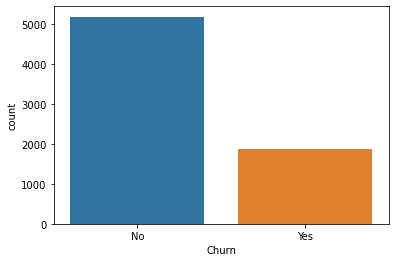

In [8]:
sns.countplot(data=df, x='Churn')

### 'Churn' por característica do cliente

Aqui será possível gerar gráficos de contagem para cada característica de cliente a fim de determinar qual delas é mais importante para sua "perda".

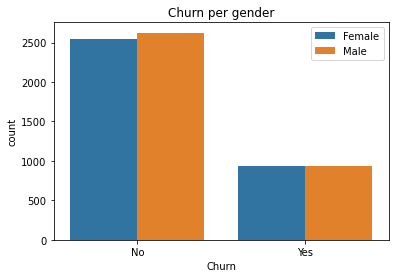

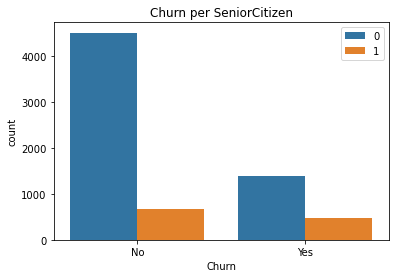

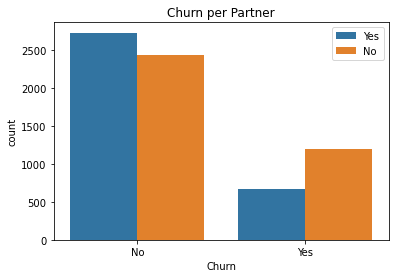

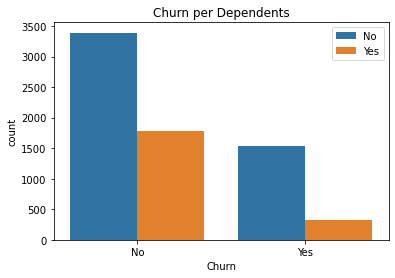

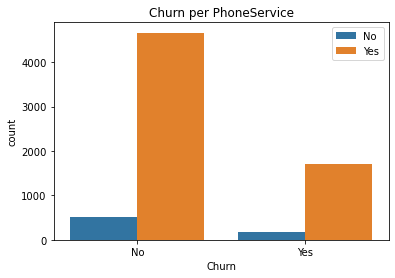

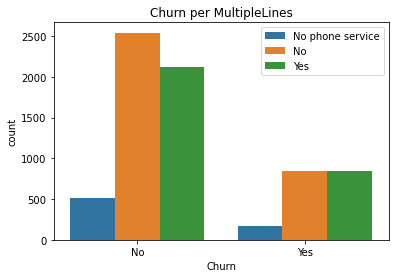

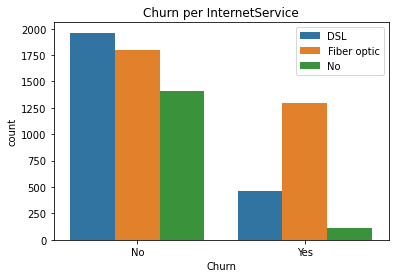

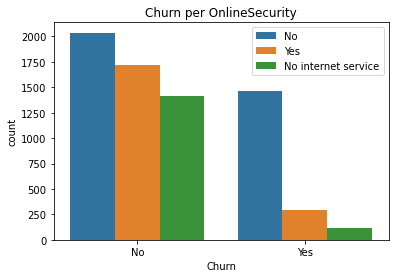

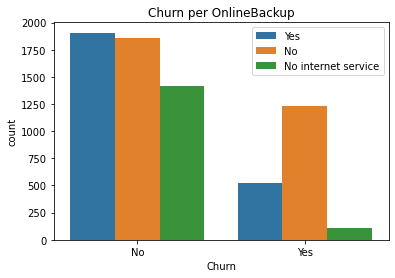

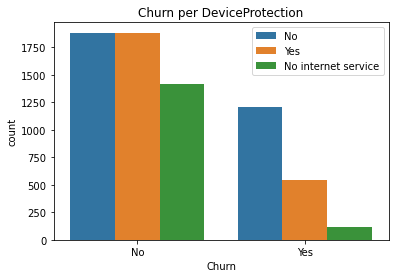

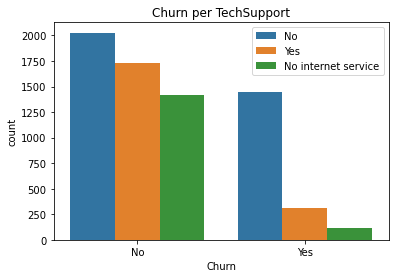

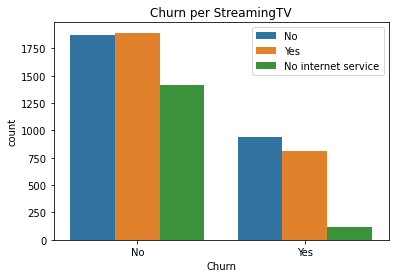

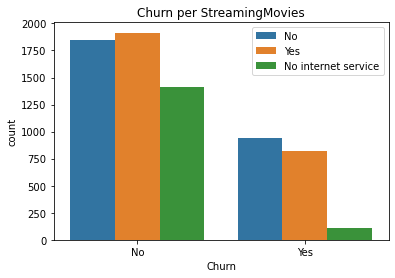

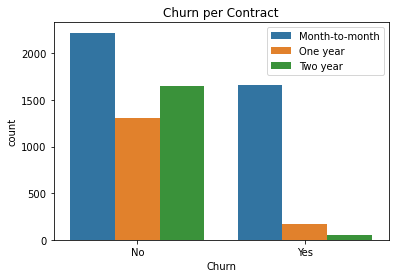

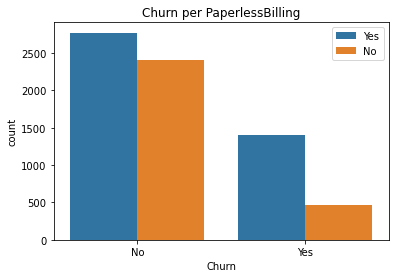

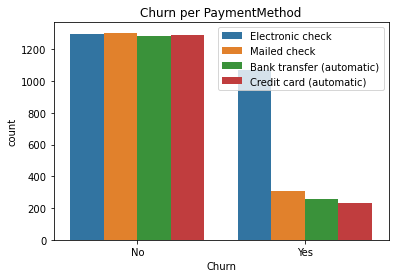

In [9]:
for i in range(0,17):
    if i != 4: #a coluna 'tenure' foi ignorada, juntamente com 'MonthlyCharges' e 'TotalCharges'
        plt.figure(figsize=(6,4))
        plt.title(f'Churn per {df.columns[i]}')
        sns.countplot(data=df, x='Churn', hue=df[df.columns[i]])
        plt.legend(loc='best')

#### Primeiras observações
A partir dos gráficos, é possível atestar que:

- Clientes idosos abandonam menos os serviços da empresa;
- Clientes sem parceiros têm maior tendência a cancelar os serviços;
- Clientes sem dependentes tendem mais a cancelar os serviços;
- Clientes com serviço de internet de fibra ótica tem maior tendência a cancelar;
- Clientes que não possuem segurança online, backup online, proteção ao dispositivo e suporte técnico também tendem mais a cancelar;
- Clientes com contratos mensais, cobrança online e pagamento por cheque eletrônico tem maior tendência a abandonar os serviços.

### 'Churn' por tempo de vínculo e valor das despesas

#### Tempo de vínculo

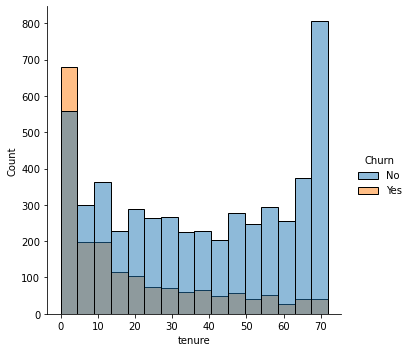

In [10]:
sns.displot(data=df, x='tenure', hue='Churn')

#### Despesas Mensais

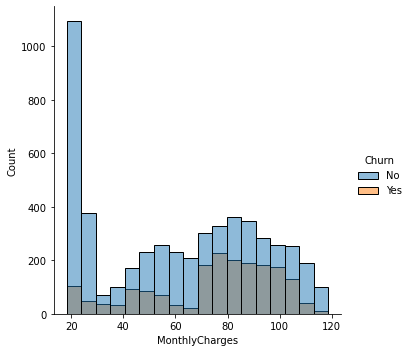

In [11]:
sns.displot(data=df, x='MonthlyCharges', hue='Churn')

#### Despesas Totais

Aqui será necessário converter os valores da coluna para valores numéricos (de 'str' para 'float')

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

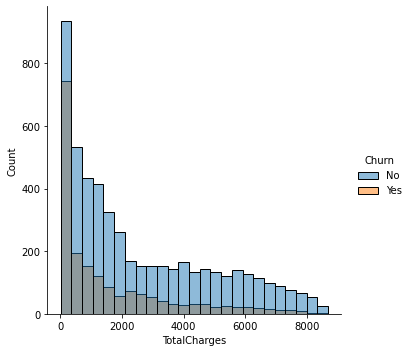

In [13]:
sns.displot(data=df, x='TotalCharges', hue='Churn')

(0.0, 1750.0)

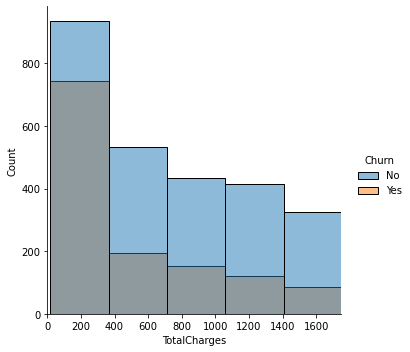

In [14]:
#dando um 'zoom' no gráfico anterior
sns.displot(data=df, x='TotalCharges', hue='Churn')
plt.xlim(0,1750)

#### Observações Finais

- Clientes com mais tempo de vínculo com a empresa tem menor tendência a cancelar os serviços; 
- Clientes com contratos mais baratos em sua totalidade tem maior tendência a cancelar.

### Outra forma de observar o 'Churn' (Correlação)

Aqui é possível observar a correlação entre determinadas características e o 'Churn'

**Observação**: quanto mais próxima de 1 a correlação, maior a contribuição para o 'Churn'

In [15]:
df_corr = pd.get_dummies(df) #gerar valores binários para os atributos não numéricos
df_corr.corr()['Churn_Yes'].sort_values().iloc[1:-1]

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
StreamingMovies_No internet service       -0.227890
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMetho

#### Constatações numéricas e novas observações

É possível observar que fatores parecidos contribuem para o 'Churn' do cliente, tais como:
- Contrato mensal
- Falta de segurança online, backup onlin, suporte técnico e proteção ao dispositivo
- Serviço de internet por fibra óptica
- Método de pagamento por cheque eletrônico

Bem como os fatores que mantém os clientes:
- Tempo de vínculo (tenure)
- Contratos de dois anos
- Ausência de serviços de internet

## 3. Classificação (Machine Learning)

### Separando os atributos e a classe a ser determinada

In [16]:
df = df.dropna() #necessário após a modificação da coluna 'TotalCharges'
X = df.drop('Churn', axis=1)
X = pd.get_dummies(X)
y = df['Churn']

**Feito isso, o dataset está pronto para ser separado em treinamento e teste!**

### Separando as bases em treinamento e teste

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
len(X_train), len(X_test), len(y_train), len(y_test) #observando e comparando o tamanho das bases

(5274, 1758, 5274, 1758)

### Escalonando os dados com StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Testando alguns classificadores

Os modelos escolhidos foram:
- k-Nearest Neighbors
- Regressão Logística
- Support Vector Machines
- Árvores de Decisão
- Random Forest

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_svm = SVC()
model_dtree = DecisionTreeClassifier()
model_rdfor = RandomForestClassifier()

In [23]:
#criando função para avaliar a precisão dos classificadores
from sklearn.metrics import accuracy_score
def classifier(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)


In [24]:
classifier(model_knn), classifier(model_lr), classifier(model_svm), classifier(model_dtree), classifier(model_rdfor), 

(0.7554038680318543,
 0.7901023890784983,
 0.7923777019340159,
 0.7258248009101251,
 0.785551763367463)

**Após essa análise rápida, dá pra observar que o classificador de Support Vector Machines foi o que se saiu melhor**

### Support Vector Machines

Agora é necessário testar alguns dos hiperparâmetros para identificar qual se sai melhor

In [25]:
model1 = SVC(kernel='rbf')
model2 = SVC(kernel='poly')
model3 = SVC(kernel='sigmoid')
model4 = SVC(kernel='linear')

In [26]:
classifier(model1), classifier(model2), classifier(model3), classifier(model4) 

(0.7923777019340159,
 0.7872582480091013,
 0.7542662116040956,
 0.7963594994311718)

**Os kernels que se saíram melhor foram os 'linear' e 'rbf'**

#### GridSearchCV

Agora o Grid Search testará combinações diferentes de hiperparâmetros para obter os melhores resultados

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
final_model = SVC()
param_grid = {'C':[0.1,1,10,100],'kernel':['linear','rbf']}
grid = GridSearchCV(final_model,param_grid,scoring='accuracy')

In [29]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

##### Melhores parâmetros do modelo

In [30]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

#### Algumas métricas de avaliação

Por fim, é preciso validar o modelo com algumas métricas:

- Matriz de confusão: Número de classificações corretas e erradas é mostrado
- Classification Report: Mostra algumas outras métricas, tal como o accuracy score

In [31]:
from sklearn.metrics import plot_confusion_matrix, classification_report

C:\Users\Emerson\anaconda3\envs\tf_py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


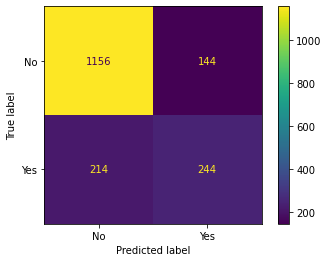

In [32]:
plot_confusion_matrix(grid,X_test,y_test)

In [33]:
y_pred = grid.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1300
         Yes       0.63      0.53      0.58       458

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



## 4. Conclusão

O modelo de classificação de Support Vector Machines se saiu razoavelmente bem nesta base de dados, com cerca de 80% de precisão.


No entanto, mesmo através do GridSearch, não foi possível observar uma melhora tão grande em seu desempenho.